In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

In [2]:
with np.load("data_7_1.npz") as data:
    x1, y1 = data["x1"], data["y1"]

# Задание 1

In [3]:
#1
import numpy as np

def l_k(xk, k, x):
    value = 1.
    for i, point in enumerate(xk):
        if i != k:
            value *= (x - point) / (xk[k] - point) 
    return value

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        n = len(self.xk)
        return sum([self.yk[i] * l_k(self.xk, i, x) for i in range(n)])

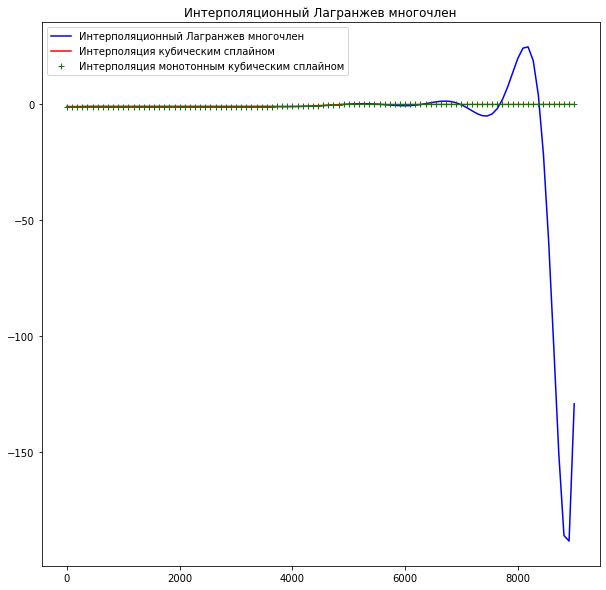

In [4]:
lagr = LagrangeInterpolator(x1, y1)
xx = np.linspace(0, 9000, 100)
yy = np.array([lagr(x) for x in xx])

plt.figure(figsize=(10, 10))
plt.title("Интерполяционный Лагранжев многочлен")

plt.plot(xx, yy, color="blue", label="Интерполяционный Лагранжев многочлен")

cs = interpolate.CubicSpline(x1, y1)
plt.plot(xx, cs(xx), color='red', label='Интерполяция кубическим сплайном')

pchip = interpolate.PchipInterpolator(x1, y1)
plt.plot(xx, pchip(xx), '+', color='green', label='Интерполяция монотонным кубическим сплайном')

plt.legend()
plt.show()

# Задание 2

/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


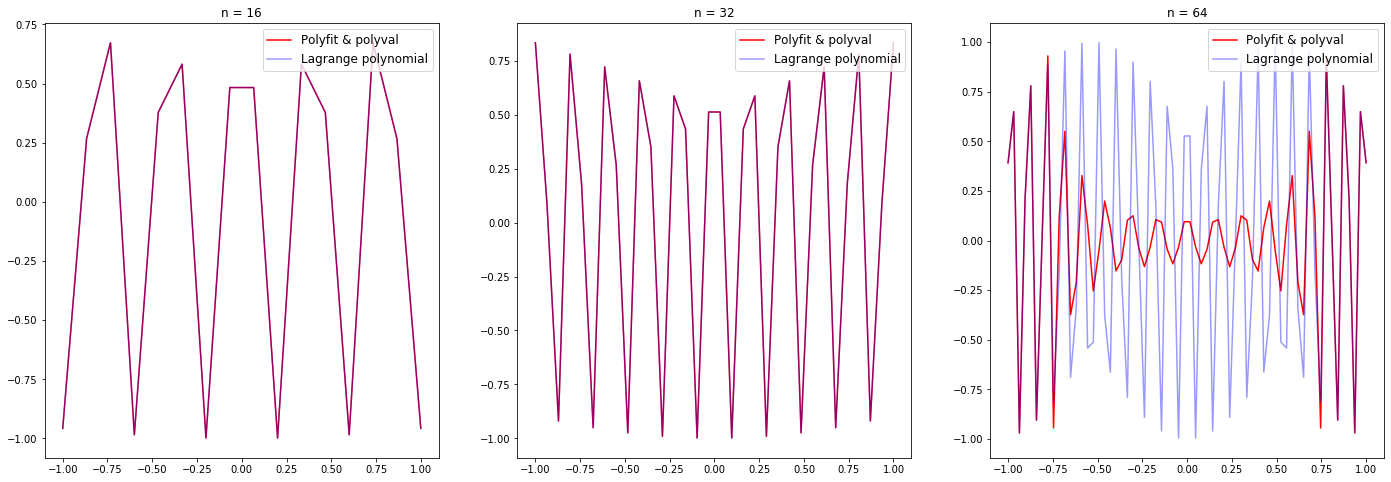

In [5]:
#2 
ns = [16, 32, 64]
fig, ax = plt.subplots(ncols=3, figsize=(24, 8))

for i, n in enumerate(ns):
    x = np.linspace(-1, 1, n)
    y = np.cos(n*x)
    pol = np.polyfit(x, y, n)
    pol_vals = np.polyval(pol, x)
      
    ax[i].set_title("n = %i" % n, fontsize=12)
    ax[i].plot(x, pol_vals, color='red', label='Polyfit & polyval')

    lagr_pol = LagrangeInterpolator(x, y)
    yy = np.array([lagr_pol(xval) for xval in x])
    ax[i].plot(x, yy, color='blue', label="Lagrange polynomial", alpha=0.4)
    ax[i].legend(fontsize=12, loc='upper right')
plt.show()

# Задание 3

In [6]:
#3
from scipy.optimize import curve_fit
with np.load("data_7_1.npz") as data:
    x4, y4 = data['x4'], data['y4']

In [7]:
def f1(x, p0, p1, p2, p3, p4, p5):
    return p0 + p1*x + p2*x**2 + p3*x**3 + p4*x**4 + p5*x**5
def f2(x, p0, p1, p2, p3, q1, q2):
    return (p0 + p1*x + p2*x**2 + p3*x**3) / (1 + q1*x + q2*x**2)

In [8]:
popt1, pcov1 = curve_fit(f1, x4, y4)
popt2, pcov2 = curve_fit(f2, x4, y4)

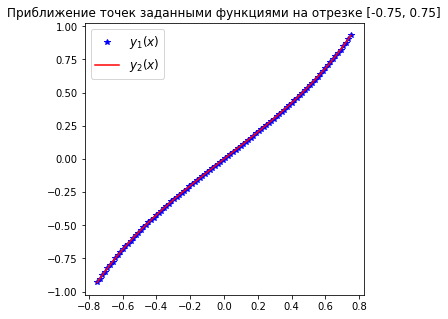

In [9]:
plt.figure(figsize=(5, 5))
plt.title("Приближение точек заданными функциями на отрезке [-0.75, 0.75]", fontsize=12)
plt.plot(x4, f1(x4, *popt1), '*', color="blue", label="$y_1(x)$")
plt.plot(x4, f2(x4, *popt2), color='red', label="$y_2(x)$")
plt.legend(fontsize=12)
plt.show()

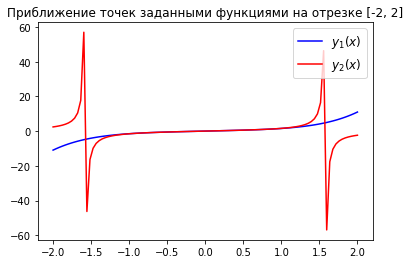

In [10]:
xx = np.linspace(-2, 2, 100)
plt.title("Приближение точек заданными функциями на отрезке [-2, 2]", fontsize=12)
plt.plot(xx, f1(xx, *popt1), color="blue", label="$y_1(x)$")
plt.plot(xx, f2(xx, *popt2), color='red', label="$y_2(x)$")
plt.legend(fontsize=12, loc='upper right')
plt.show()